# EDA and ML implementation on stock prices

Made by: Sumedh Bhamre

Main focus on bank stocks and see how they progressed through a certain time frame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly.express as px
import cufflinks as cf
cf.go_offline()

## Getting the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using the public api!

First we need to start with the proper imports for that, which we've already laid out for you here.

We will be using:
1.  yfinance module:
    Yahoo finance is a public api that provides information about stocks of various companies.
2.  date-time module:
    Makes manipulation of date and time fields in various formats easier

In [2]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import datetime as dt

## Data

We will get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase

and of the following tech companies:
* Google
* Apple
* Microsoft
* Nvidia

Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve the following few steps:
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.


### Firstly make sure that the yfinance api is working properly

In [4]:
#setting a start and end date
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2022, 1, 1)

In [5]:
# Define the ticker symbol
ticker_symbol = "BAC"

# Access historical price data
price_data = yf.download(ticker_symbol, start="2022-01-01", end="2023-01-01")

# Access dividend data
dividends = yf.Ticker(ticker_symbol).dividends

# Access split data
splits = yf.Ticker(ticker_symbol).splits

# Access fundamental data
income_statement = yf.Ticker(ticker_symbol).quarterly_financials
balance_sheet = yf.Ticker(ticker_symbol).quarterly_balance_sheet
cash_flow = yf.Ticker(ticker_symbol).quarterly_cashflow

# Display the data
print("Price Data:")
print(price_data)

print("\nDividends:")
print(dividends)

print("\nSplits:")
print(splits)

print("\nIncome Statement:")
print(income_statement)

print("\nBalance Sheet:")
print(balance_sheet)

print("\nCash Flow:")
print(cash_flow)

[*********************100%***********************]  1 of 1 completed
Price Data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-01-03  45.090000  46.490002  44.980000  46.180000  44.115795  58587900
2022-01-04  47.060001  48.430000  47.040001  47.990002  45.844891  74606700
2022-01-05  48.139999  48.369999  47.160000  47.180000  45.071091  57791600
2022-01-06  47.980000  48.160000  47.189999  48.130001  45.978626  52040900
2022-01-07  48.150002  49.310001  48.060001  49.180000  46.981697  59082600
...               ...        ...        ...        ...        ...       ...
2022-12-23  32.400002  32.580002  32.189999  32.470001  31.740862  21378600
2022-12-27  32.500000  32.669998  32.279999  32.529999  31.799511  22776100
2022-12-28  32.570000  32.970001  32.529999  32.770000  32.034122  30541000
2022-12-29  32.889999  33.160000  32.750000  33.139999  32.395817  22252900
2022-12

Outcome 2: Understanding the API


Above is all the info yfinance offers about a single company:
stocks,dividends,income statement,cash flow and etc.

# Merging the info into a single database
We will be analysing the data of different banks together in a given time frame thus having a combined single datasource is important 
So we combine it into a single dataframe

In [6]:
bank_symbols = ["BAC", "C", "GS", "JPM"]

bank_data = pd.DataFrame()

for symbol in bank_symbols:
    data = yf.download(symbol, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close', 'Volume',]]
    data.columns = pd.MultiIndex.from_product([[symbol], data.columns])
    bank_data = pd.concat([bank_data, data], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
bank_data.columns.names = ['Bank','Stock Info']
bank_data.head()

Bank              BAC                                                     C  \
Stock Info       Open       High        Low      Close    Volume       Open   
Date                                                                          
2019-01-02  24.080000  25.139999  24.010000  24.959999  71836300  50.680000   
2019-01-03  24.940001  25.040001  24.450001  24.559999  66599600  53.410000   
2019-01-04  25.100000  25.650000  25.030001  25.580000  83829100  54.009998   
2019-01-07  25.559999  25.780001  25.290001  25.559999  57016300  55.330002   
2019-01-08  25.719999  25.790001  25.090000  25.510000  67339400  56.029999   

Bank                                                           GS              \
Stock Info       High        Low      Close    Volume        Open        High   
Date                                                                            
2019-01-02  53.740002  50.669998  53.529999  21646300  164.330002  172.250000   
2019-01-03  53.619999  52.220001  52.560001  21183000  170.660004  171.770004   
2019-01-04  55.380001  53.660000  55.130001  24205100  172.990005  176.000000   
2019-01-07  56.209999  54.799999  55.610001  20634100  175.229996  177.830002   
2019-01-08  56.189999  54.759998  55.459999  18840100  177.779999  178.100006   

Bank                                                JPM              \
Stock Info         Low       Close   Volume        Open        High   
Date                                                                  
2019-01-02  163.350006  172.029999  3999400   95.949997   99.779999   
2019-01-03  168.289993  169.509995  4060200   98.639999   98.889999   
2019-01-04  171.100006  175.050003  3788300   99.110001  100.930000   
2019-01-07  172.270004  176.020004  3152100  100.430000  101.470001   
2019-01-08  172.899994  175.369995  2692700  101.629997  101.820000   

Bank                                         
Stock Info        Low       Close    Volume  
Date                                         
2019-01-02  95.940002   99.309998  15670900  
2019-01-03  96.690002   97.110001  16286400  
2019-01-04  98.279999  100.690002  16935200  
2019-01-07  99.709999  100.760002  15430700  
2019-01-08  99.550003  100.570000  13578800

In [8]:
bank_data.to_excel('bank_data.xlsx')

In [9]:
tech_symbols = ["MSFT", "NVDA", "GOOG", "AAPL"]

tech_data = pd.DataFrame()

for symbol in tech_symbols:
    data = yf.download(symbol, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    data.columns = pd.MultiIndex.from_product([[symbol], data.columns])
    tech_data = pd.concat([tech_data, data], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
tech_data.columns.names = ['Company','Stock Info']
tech_data.head()

Company           MSFT                                                \
Stock Info        Open        High         Low       Close    Volume   
Date                                                                   
2019-01-02   99.550003  101.750000   98.940002  101.120003  35329300   
2019-01-03  100.099998  100.190002   97.199997   97.400002  42579100   
2019-01-04   99.720001  102.510002   98.930000  101.930000  44060600   
2019-01-07  101.639999  103.269997  100.980003  102.059998  35656100   
2019-01-08  103.040001  103.970001  101.709999  102.800003  31514400   

Company          NVDA                                                  GOOG  \
Stock Info       Open       High        Low      Close    Volume       Open   
Date                                                                          
2019-01-02  32.660000  34.619999  32.512501  34.055000  50875200  50.828499   
2019-01-03  33.447498  33.790001  31.922501  31.997499  70555200  52.049999   
2019-01-04  32.735001  34.432499  32.424999  34.047501  58562000  51.629501   
2019-01-07  34.625000  36.222500  34.107498  35.849998  70916000  53.575001   
2019-01-08  36.672501  36.695000  34.224998  34.957500  78601600  53.805500   

Company                                                     AAPL             \
Stock Info       High        Low      Close    Volume       Open       High   
Date                                                                          
2019-01-02  52.616001  50.785500  52.292500  30652000  38.722500  39.712502   
2019-01-03  52.848999  50.703499  50.803001  36822000  35.994999  36.430000   
2019-01-04  53.542000  51.370899  53.535500  41878000  36.132500  37.137501   
2019-01-07  53.700001  52.737999  53.419498  39638000  37.174999  37.207500   
2019-01-08  54.228001  53.026501  53.813999  35298000  37.389999  37.955002   

Company                                      
Stock Info        Low      Close     Volume  
Date                                         
2019-01-02  38.557499  39.480000  148158800  
2019-01-03  35.500000  35.547501  365248800  
2019-01-04  35.950001  37.064999  234428400  
2019-01-07  36.474998  36.982498  219111200  
2019-01-08  37.130001  37.687500  164101200

In [11]:
tech_data.to_excel('tech_data.xlsx')

# Usual exploratory data analysis
Now that we have formed a complete datasheet we will do the usual preprocessing
this includes null values checking and other info 

I will be performing this only on bank data just to demonstrate

(The API rarely gives data with any errors but we will still check once to make sure)

In [12]:
bank_data.shape

(757, 20)

In [13]:
bank_data.info
#the data is in the form of a dataframe of dataframes thus we will get different outputs

<bound method DataFrame.info of Bank              BAC                                                     C  \
Stock Info       Open       High        Low      Close    Volume       Open   
Date                                                                          
2019-01-02  24.080000  25.139999  24.010000  24.959999  71836300  50.680000   
2019-01-03  24.940001  25.040001  24.450001  24.559999  66599600  53.410000   
2019-01-04  25.100000  25.650000  25.030001  25.580000  83829100  54.009998   
2019-01-07  25.559999  25.780001  25.290001  25.559999  57016300  55.330002   
2019-01-08  25.719999  25.790001  25.090000  25.510000  67339400  56.029999   
...               ...        ...        ...        ...       ...        ...   
2021-12-27  44.549999  44.820000  44.310001  44.639999  33879200  60.400002   
2021-12-28  44.470001  45.080002  44.419998  44.700001  32492400  60.439999   
2021-12-29  44.849998  45.119999  44.599998  44.630001  25294900  60.810001   
2021-12-30  44.75000

In [14]:
for symbol in bank_symbols:
    print(bank_data[symbol].shape)

(757, 5)
(757, 5)
(757, 5)
(757, 5)


In [15]:
for symbol in bank_symbols:
    df=pd.DataFrame(bank_data[symbol])
    print(symbol)
    print(df.info())

BAC
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    757 non-null    float64
 1   High    757 non-null    float64
 2   Low     757 non-null    float64
 3   Close   757 non-null    float64
 4   Volume  757 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.5 KB
None
C
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    757 non-null    float64
 1   High    757 non-null    float64
 2   Low     757 non-null    float64
 3   Close   757 non-null    float64
 4   Volume  757 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.5 KB
None
GS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 co

In [16]:
for symbol in bank_symbols:
    df=pd.DataFrame(bank_data[symbol])
    print(symbol)
    print(df.isna().sum())

BAC
Stock Info
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
C
Stock Info
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
GS
Stock Info
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
JPM
Stock Info
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


# Analysing volume of stocks being traded each day

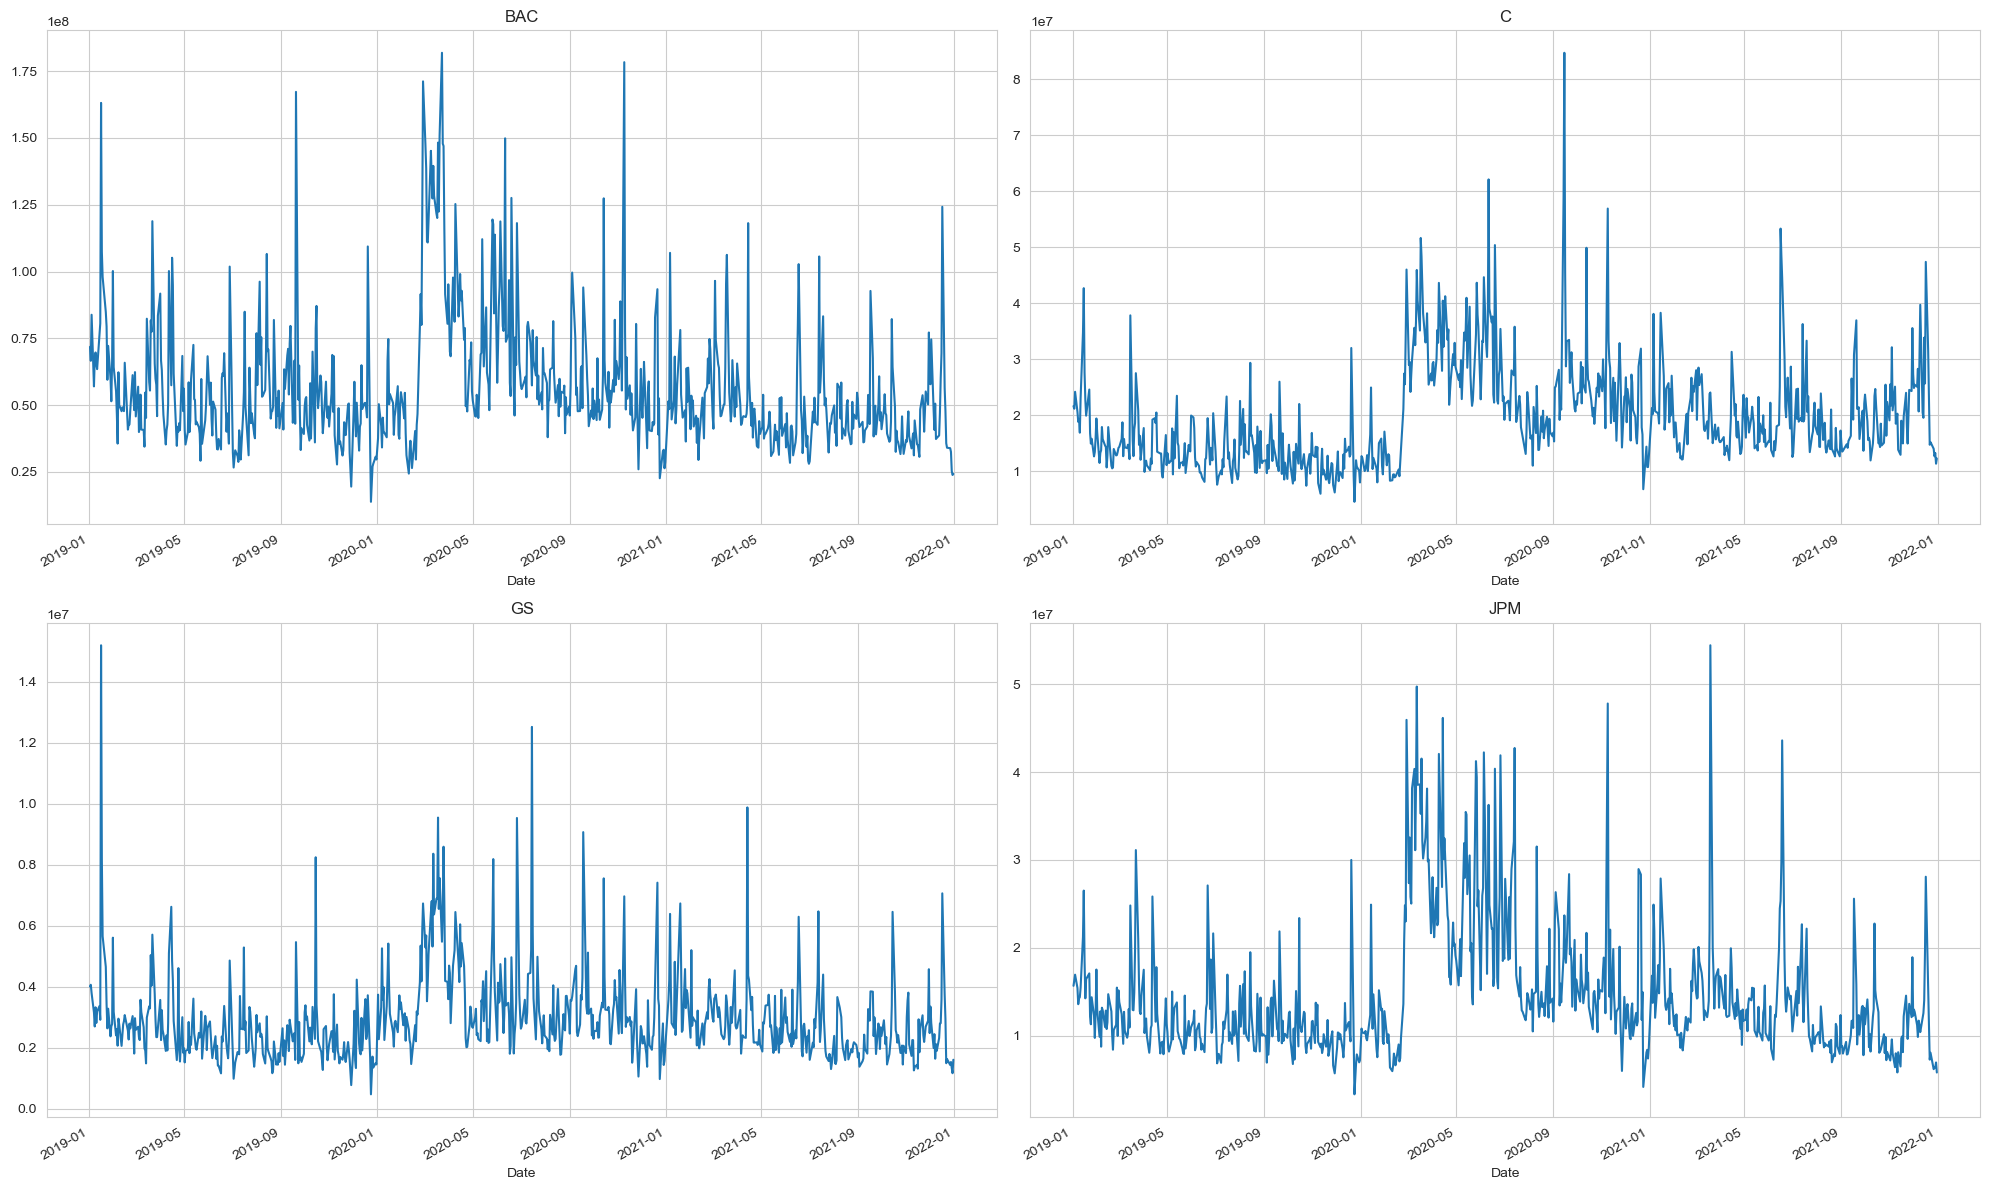

In [17]:
#for banks
plt.figure(figsize=(20,12))
for i, company in enumerate(bank_symbols,1):
    plt.subplot(2, 2, i)
    df=bank_data[company]
    df['Volume'].plot()
    plt.title(company)

plt.tight_layout()

In [18]:
for company in (tech_symbols):
    df=tech_data[company]
    fig = px.line(df, y="Volume", title=company,template = 'plotly_dark')
    fig.show()

Outcome 2:Verifying correlation between volume of shares sold


No concrete corellation can be observed between the volume of shares sold during a period of time among companies 

In [19]:
vol=pd.DataFrame()
for tick in tech_symbols:
    vol[tick+' Volume'] = tech_data[tick]['Volume'].pct_change()
vol.head()

MSFT Volume  NVDA Volume  GOOG Volume  AAPL Volume
Date                                                          
2019-01-02          NaN          NaN          NaN          NaN
2019-01-03     0.205206     0.386829     0.201292     1.465252
2019-01-04     0.034794    -0.169983     0.137309    -0.358168
2019-01-07    -0.190749     0.210956    -0.053489    -0.065338
2019-01-08    -0.116157     0.108376    -0.109491    -0.251060

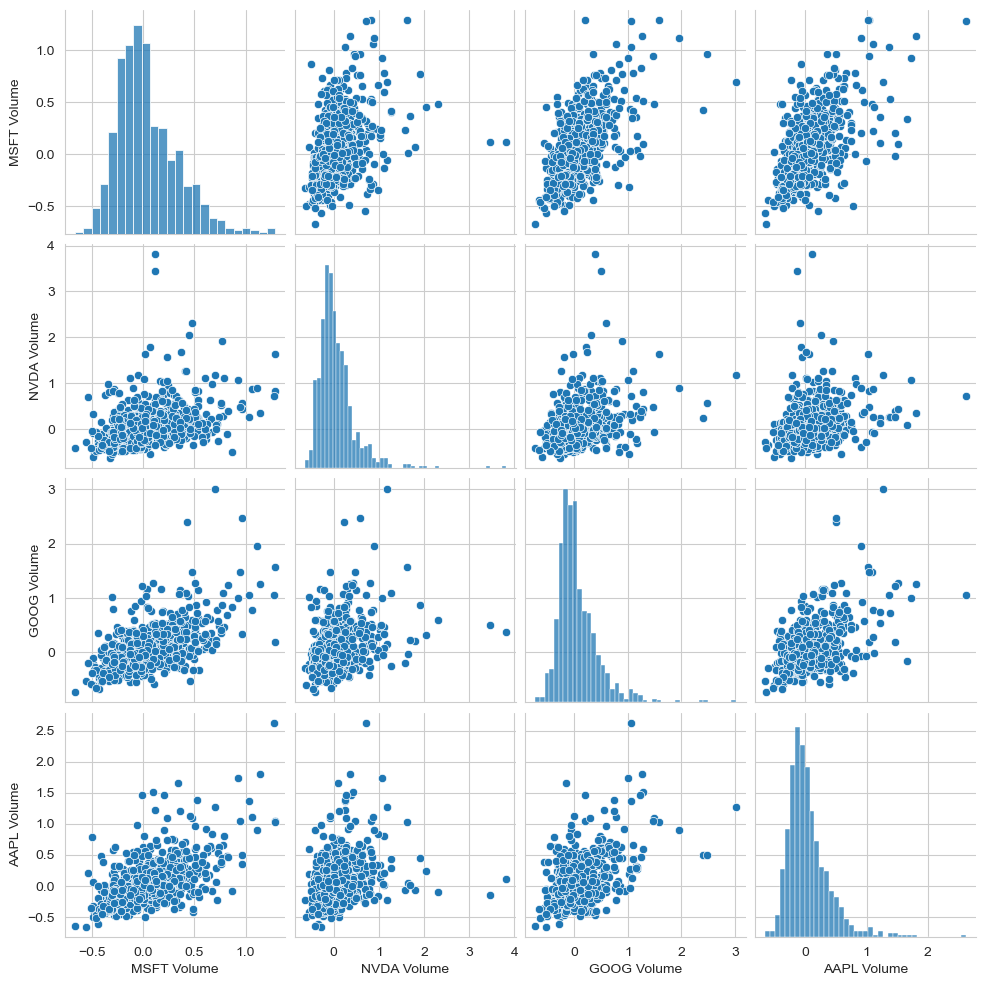

In [20]:
sns.pairplot(vol[1:])

# Analysing closing price of all stocks

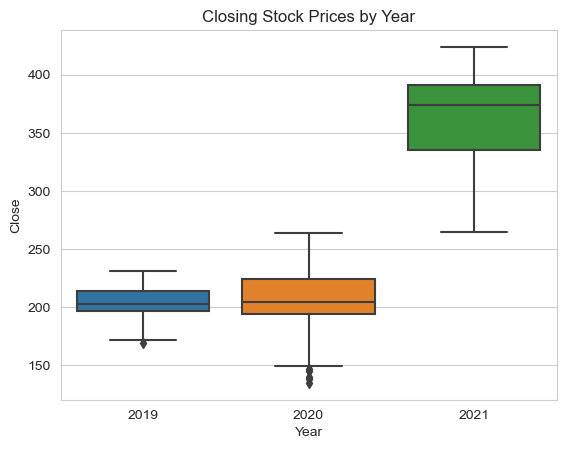

In [21]:
import datetime as dt
#analysing closing price by year of GS
df = bank_data['GS']
df['Year'] = df.index.year

# Create the boxplot
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')

# Show the plot
plt.show() 

The median and average price increased but so did the variance indicating a larger spread of values i.e volatility

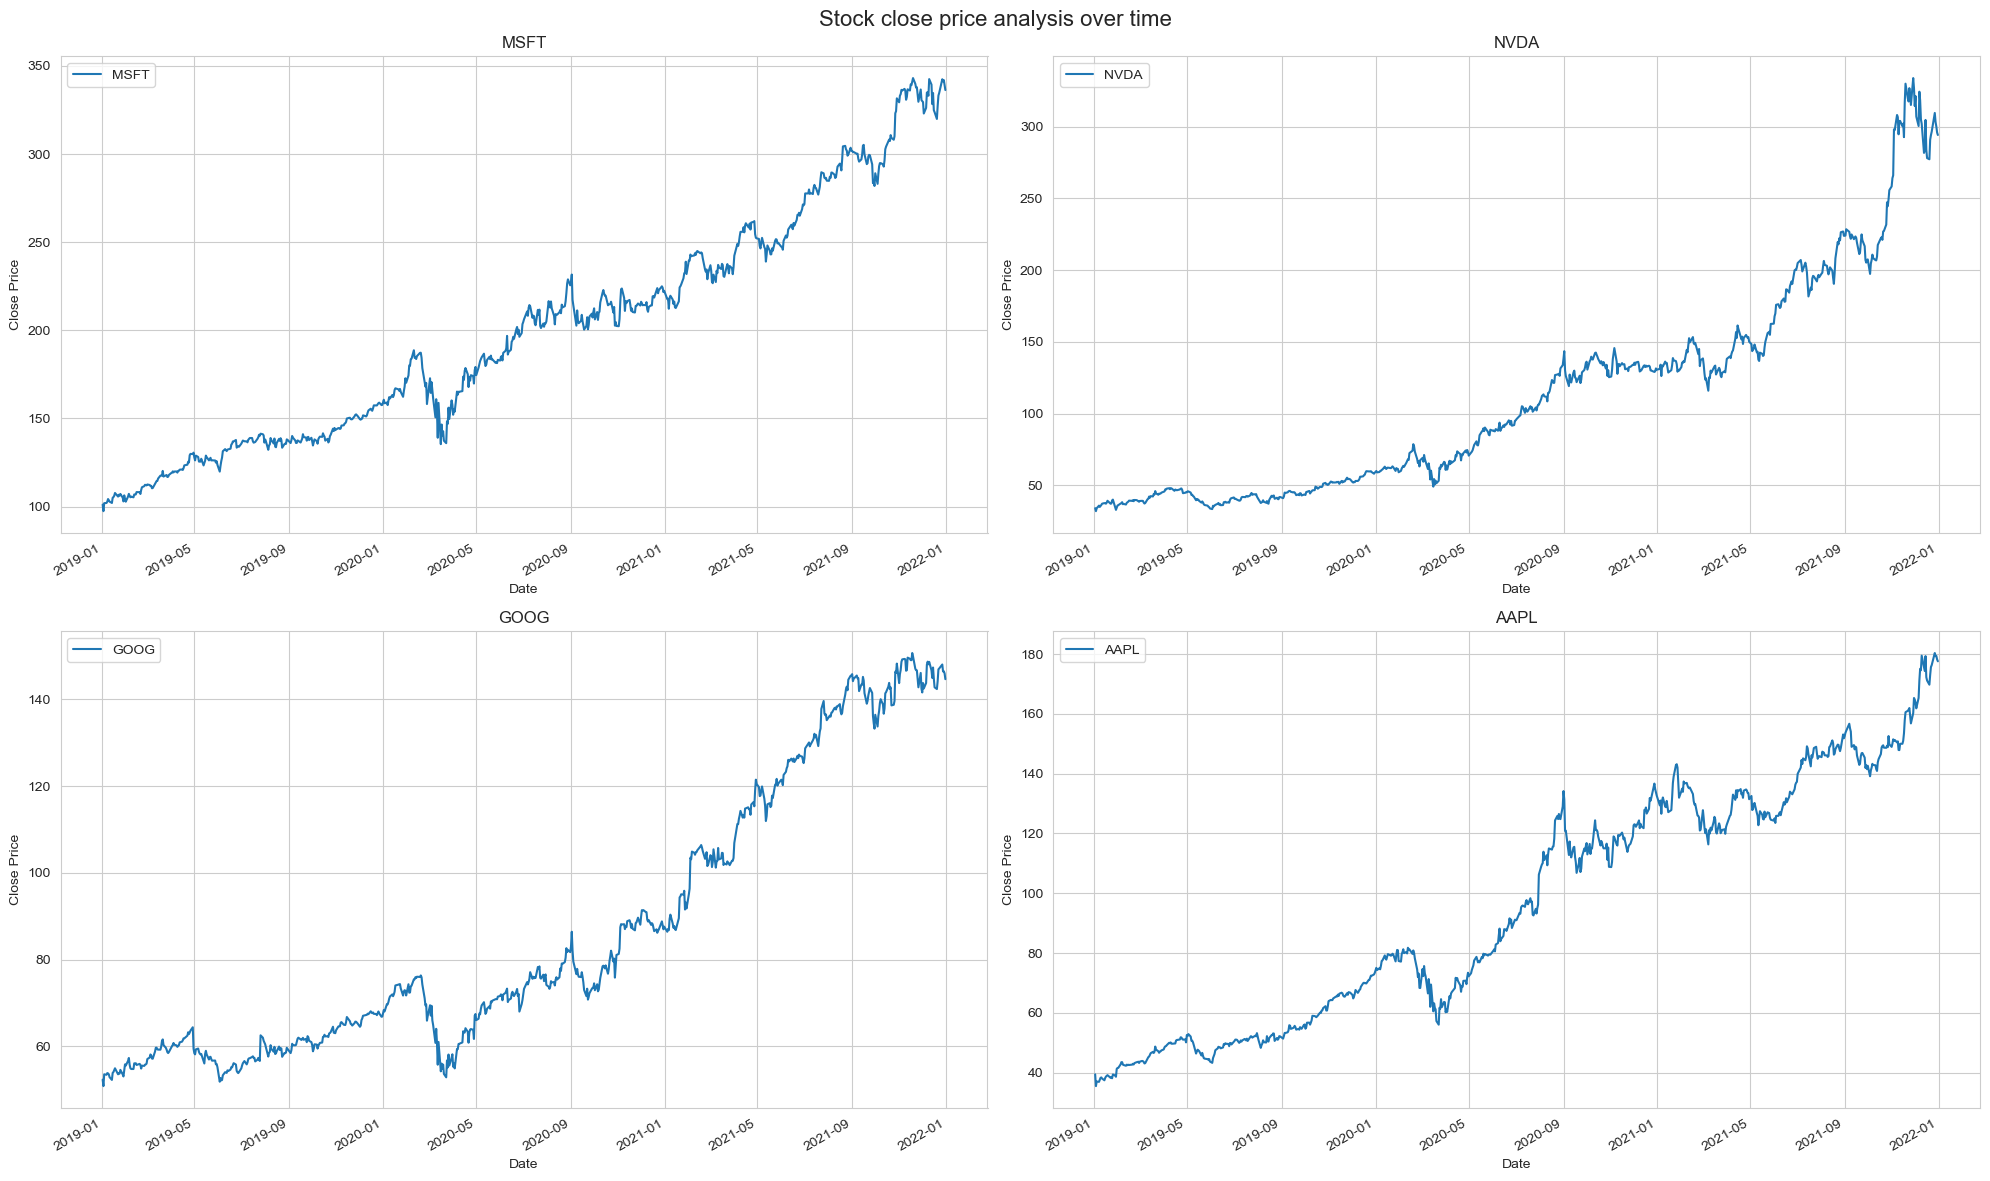

In [22]:
# tech stocks independently
plt.figure(figsize=(20, 12))
plt.suptitle("Stock close price analysis over time", fontsize=16)

for i, symbol in enumerate(tech_symbols, 1):
    plt.subplot(2, 2, i)
    tech_data[symbol]['Close'].plot(label=symbol)
    plt.title(symbol)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

plt.tight_layout()
plt.show()

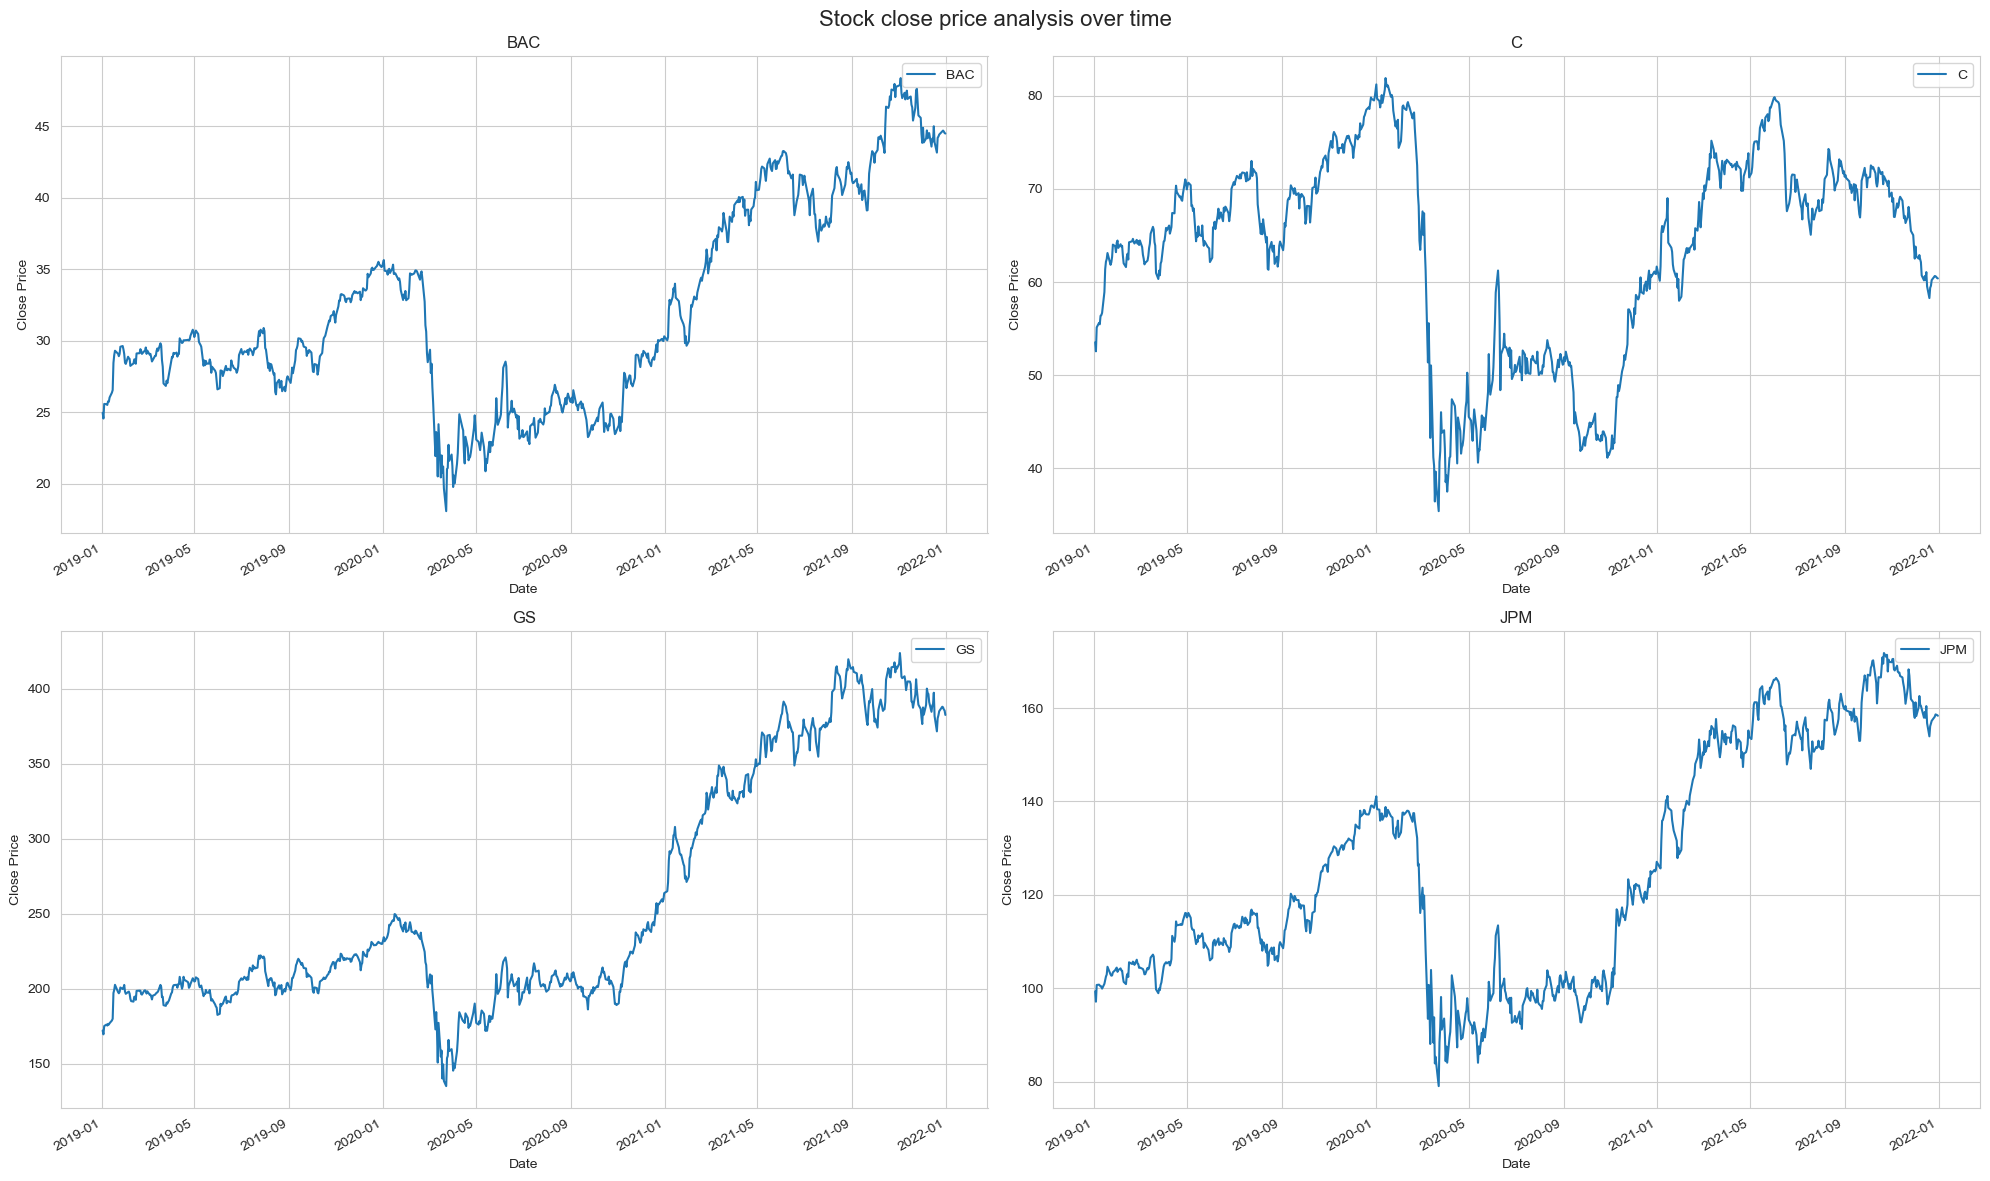

In [23]:
# bank stoks independently
plt.figure(figsize=(20, 12))
plt.suptitle("Stock close price analysis over time", fontsize=16)

for i, symbol in enumerate(bank_symbols, 1):
    plt.subplot(2, 2, i)
    bank_data[symbol]['Close'].plot(label=symbol)
    plt.title(symbol)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

plt.tight_layout()
plt.show()

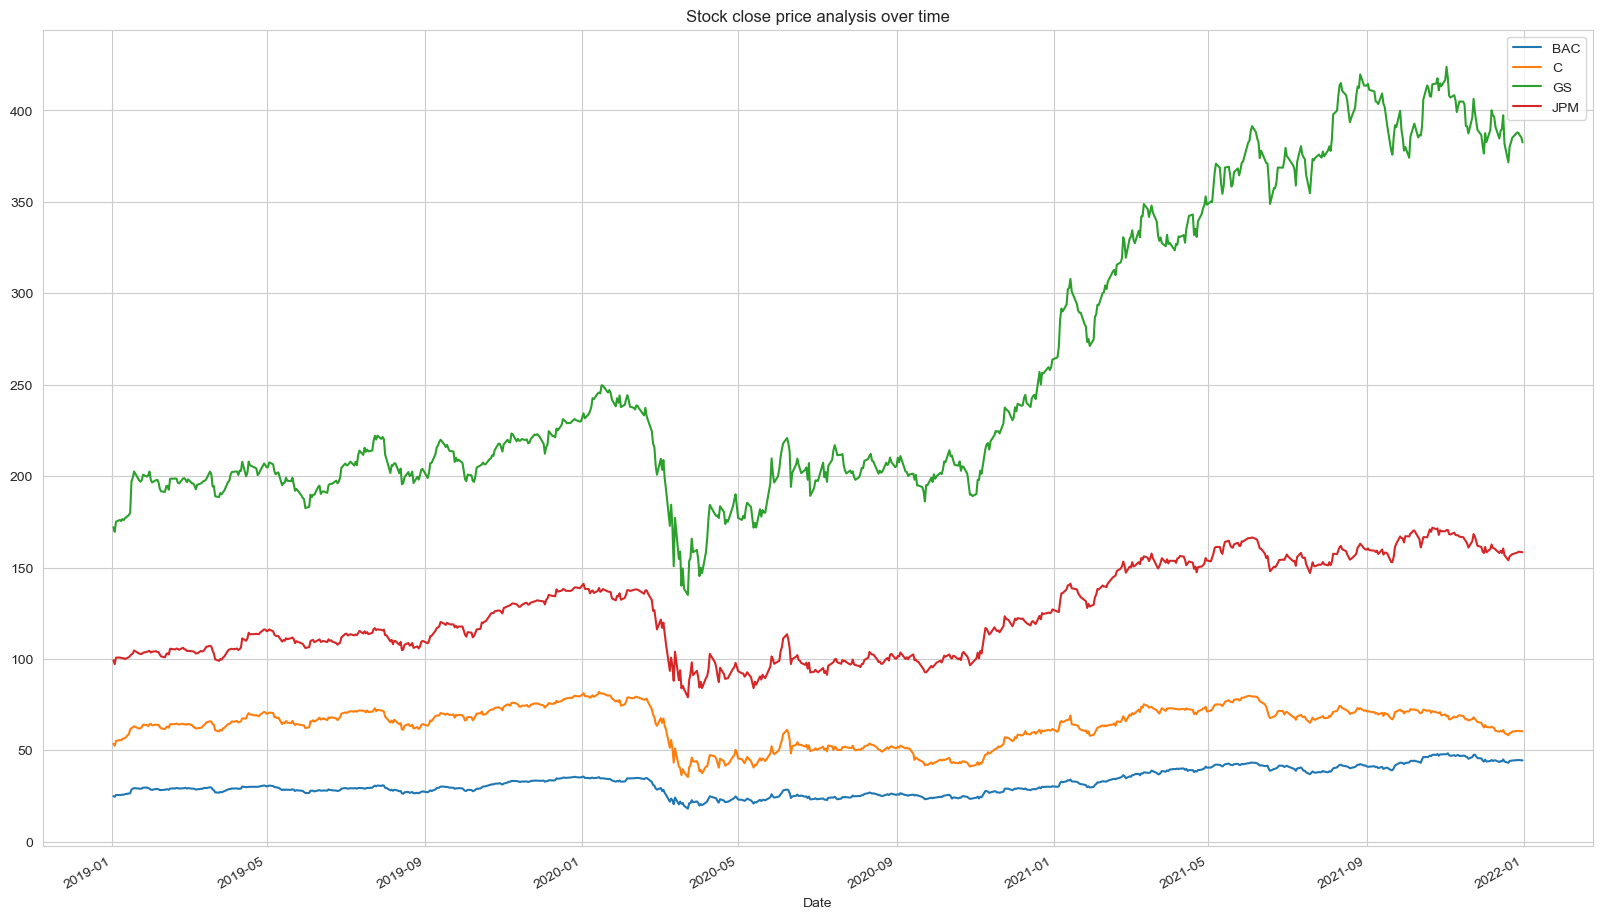

In [24]:
# bank stocks closing price analysis together
plt.figure(figsize=(20,12))
for symbol in bank_symbols:
    bank_data[symbol]['Close'].plot(label=symbol)
plt.title("Stock close price analysis over time")
plt.legend()

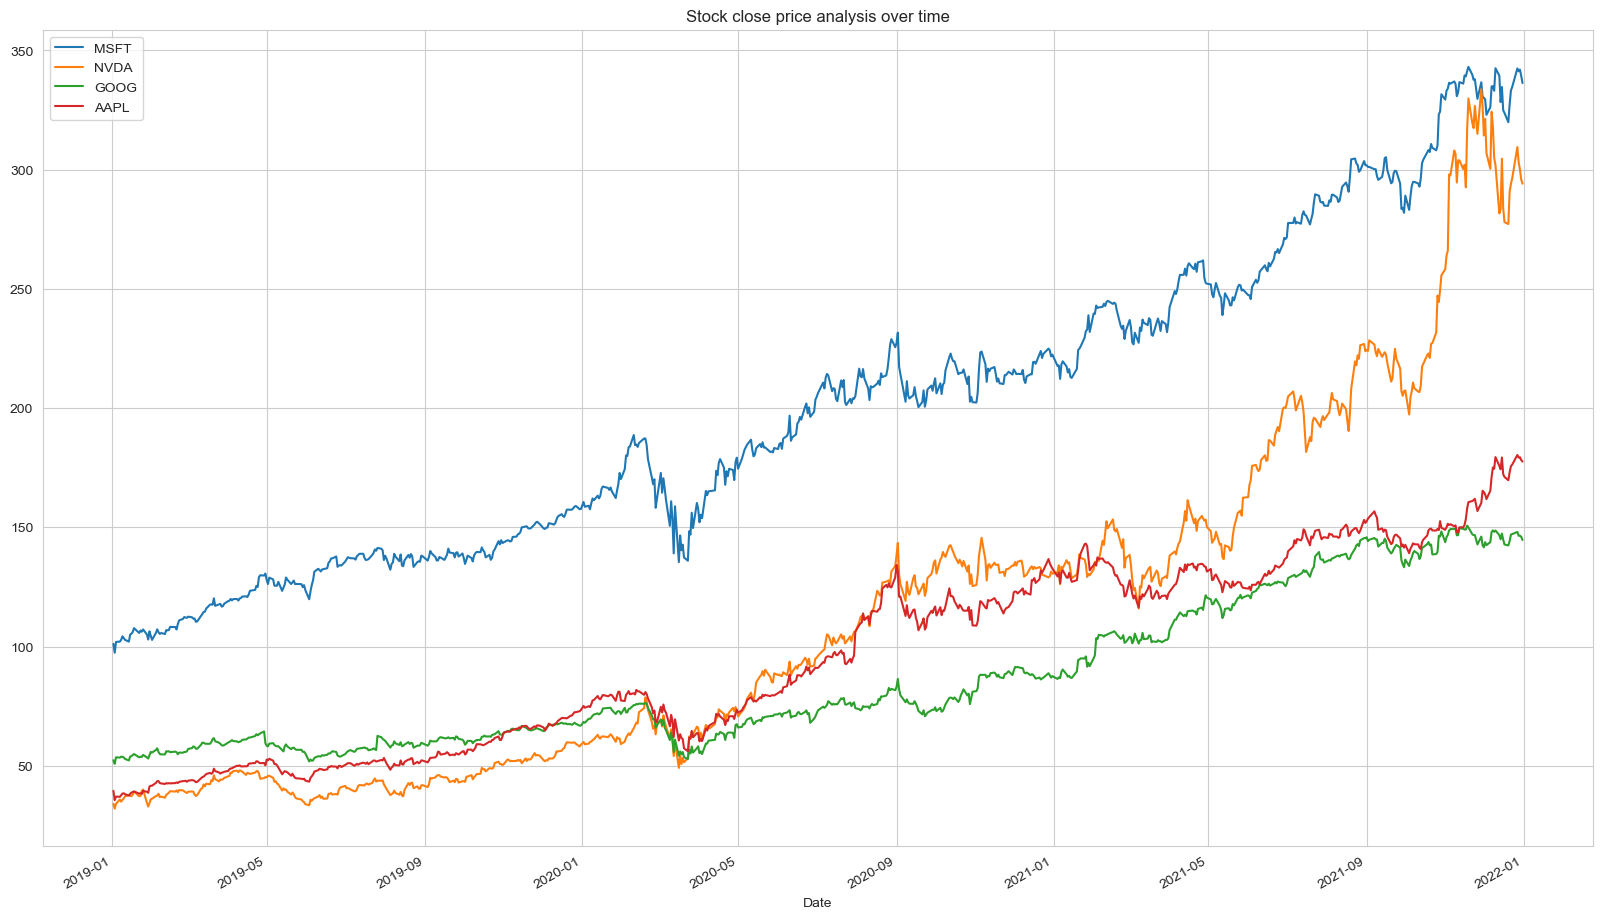

In [25]:
# tech stock closing price analysis together
plt.figure(figsize=(20,12))
for symbol in tech_symbols:
    tech_data[symbol]['Close'].plot(label=symbol)
plt.title("Stock close price analysis over time")
plt.legend()

Outcome 3: Effect of recession due to COVID-19

On observing the graphs we realize that pretty much all the stocks let they be tech or otherwise experience a downfall near the start of 2020(March and April being the most prominent)

This was when COVID-19 hit on a worldwide scale.

After this if we compare the graphs we realize that the tech Companies were not only able to quickly regain their origional values but also outgrow it whereas the banks had a tough time doing so

Lets make a joint interactive graph to view this

In [26]:
fig = px.line(title="Stock Close Price Analysis Over Time")
bank_symbols1 = [ "C", "GS"]
tech_symbols1 = ["MSFT", "NVDA"]
for symbol in tech_symbols1:
    fig.add_scatter(x=tech_data[symbol].index, y=tech_data[symbol]['Close'], mode='lines', name=symbol)
    
for symbol in bank_symbols1:
    
    fig.add_scatter(x=bank_data[symbol].index, y=bank_data[symbol]['Close'], mode='lines', name=symbol)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Symbols',
)

fig.show()

Max closing price of banks/stocks through the time period?

In [27]:
df=bank_data.xs(key='Close',axis=1,level='Stock Info').max()

In [28]:
df1=tech_data.xs(key='Close',axis=1,level='Stock Info').max()

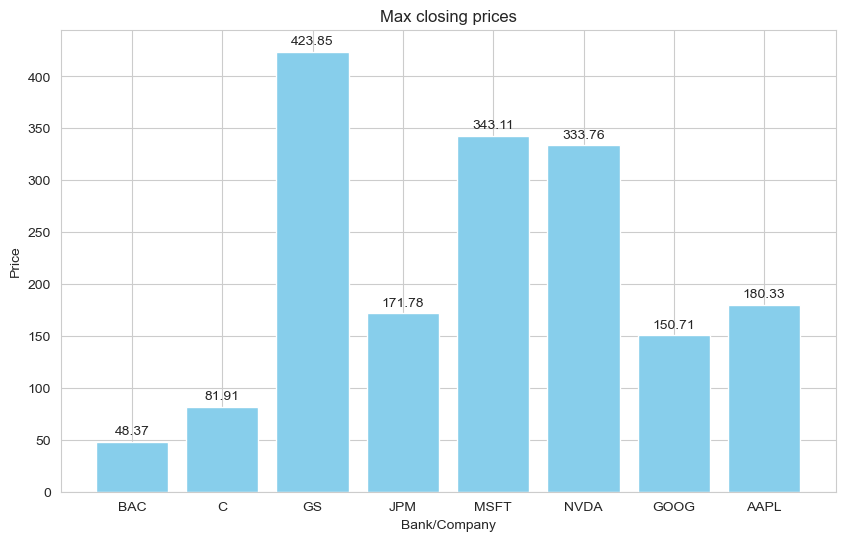

In [29]:
plt.figure(figsize=(10, 6))  
bars=plt.bar(df.index, df, color='skyblue')
bars1=plt.bar(df1.index, df1, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',  
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords='offset points',
                 ha='center', va='bottom')
for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords='offset points',
                ha='center', va='bottom')
plt.xlabel('Bank/Company')
plt.ylabel('Price')
plt.title('Max closing prices')
plt.show()

# Correlation analysis

Thought closing price is a viable statistic we cant use it to directly compare stock prices as the opening prices are different of each bank when the time frame starts thus the smarter way to do this is to use a change i.e. return metric

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [30]:
returns_bank=pd.DataFrame()
returns_tech=pd.DataFrame()
returns_combined=pd.DataFrame()
for tick in bank_symbols:
    returns_bank[tick+' Returns'] = bank_data[tick]['Close'].pct_change()
for tick in tech_symbols:
    returns_tech[tick+' Returns'] = tech_data[tick]['Close'].pct_change()
for tick in tech_symbols1:
    returns_combined[tick+' Returns'] = tech_data[tick]['Close'].pct_change()
for tick in bank_symbols1:
    returns_combined[tick+' Returns'] = bank_data[tick]['Close'].pct_change()
returns_bank.head()

BAC Returns  C Returns  GS Returns  JPM Returns
Date                                                       
2019-01-02          NaN        NaN         NaN          NaN
2019-01-03    -0.016026  -0.018121   -0.014649    -0.022153
2019-01-04     0.041531   0.048896    0.032682     0.036865
2019-01-07    -0.000782   0.008707    0.005541     0.000695
2019-01-08    -0.001956  -0.002697   -0.003693    -0.001886

Distplot for returns of Goldman Sachs

<Axes: xlabel='GS Returns', ylabel='Count'>

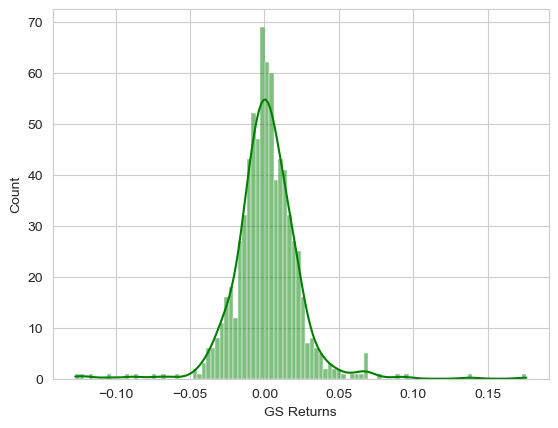

In [31]:
sns.histplot(returns_bank['GS Returns'],color='green',bins=100,kde=True)

In [32]:
fig = px.line(returns_bank, x=returns_bank.index, y='GS Returns', title='Interactive Plot of GS Returns')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Returns')

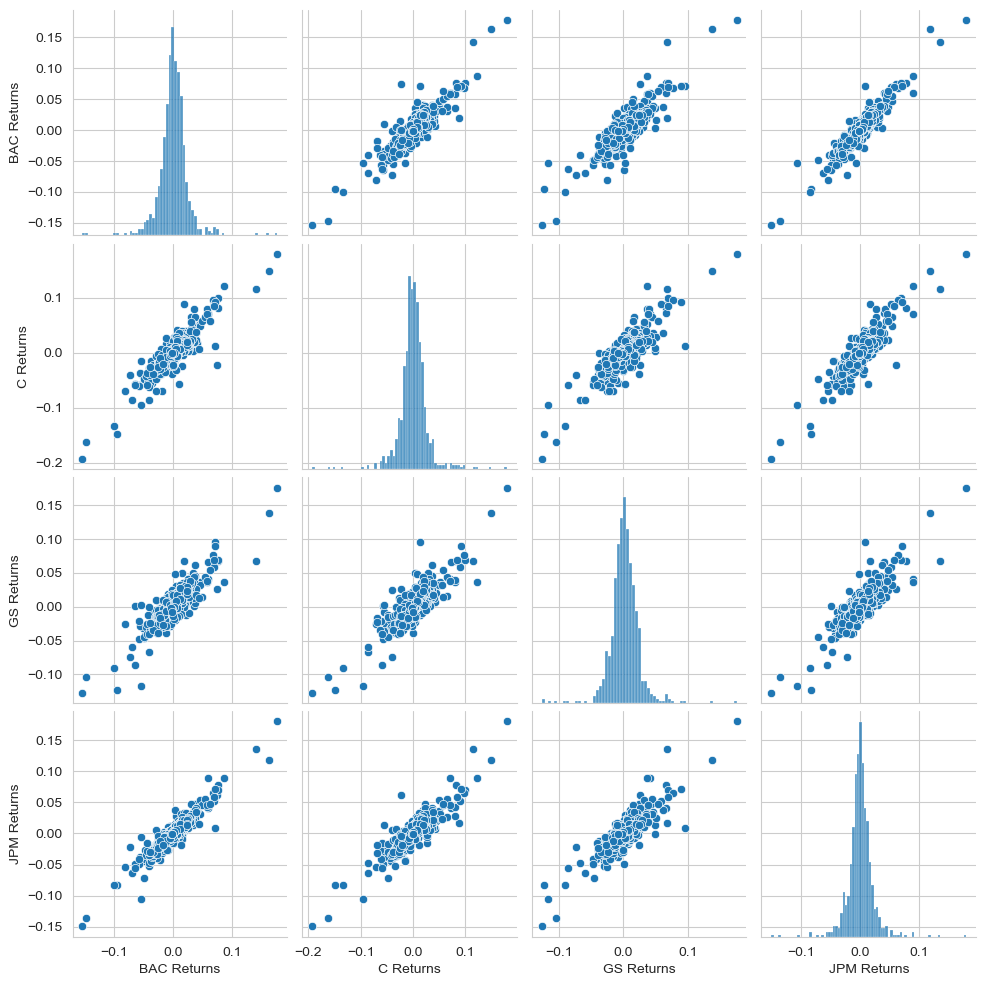

In [33]:
sns.pairplot(returns_bank[1:])

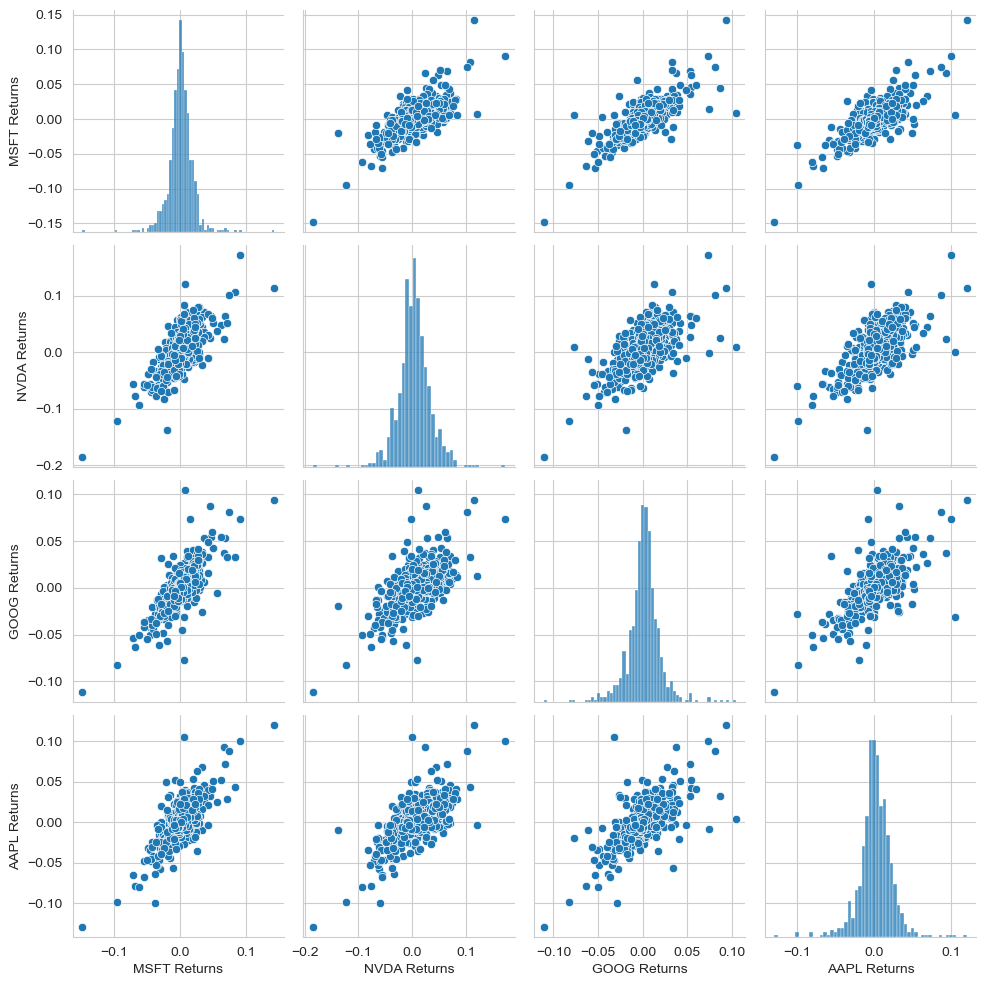

In [34]:
sns.pairplot(returns_tech)

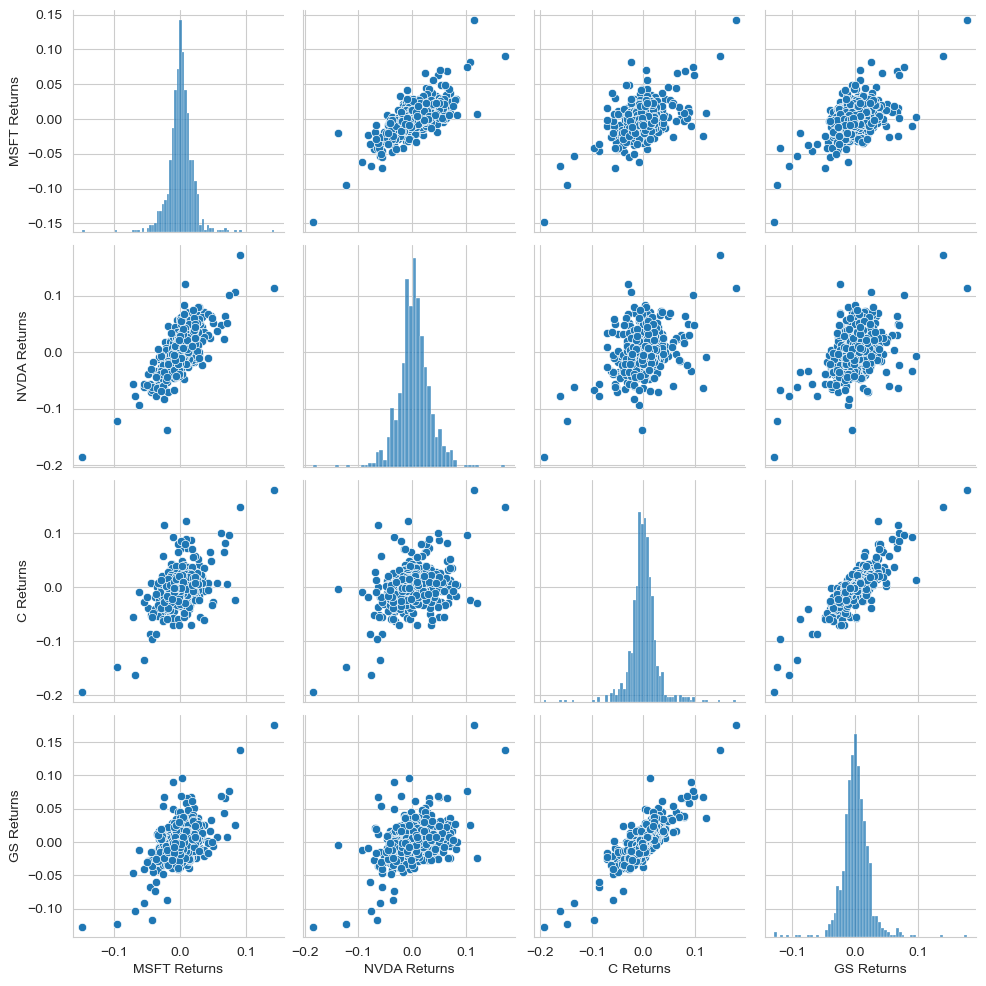

In [35]:
sns.pairplot(returns_combined)

Outcome 5:

The observations tell us that the tech sector and bank sectors are related among themselves

but not to the other sector as seen in the combined graph

<Axes: xlabel='Bank', ylabel='Bank'>

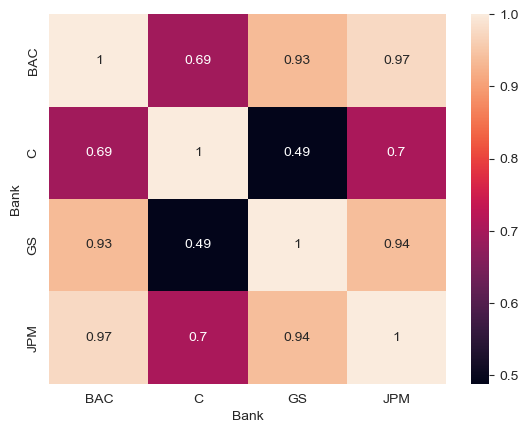

In [36]:
sns.heatmap(bank_data.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [37]:
close_corr = tech_data.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

On which day did the companies and banks experience the highest returns?

In [38]:
returns_bank.idxmax()

BAC Returns   2020-03-13
C Returns     2020-03-13
GS Returns    2020-03-13
JPM Returns   2020-03-13
dtype: datetime64[ns]

In [39]:
returns_tech.idxmax()

MSFT Returns   2020-03-13
NVDA Returns   2020-03-24
GOOG Returns   2019-07-26
AAPL Returns   2020-03-13
dtype: datetime64[ns]

Notice how that date is same for almost all of the stocks that is because at this time the stocks were being squandered due to increasing tension related to covid 19 pandemic 

How does one measure how risky a stock is?

one metric of this is the standard deviation of returns 

In [40]:
print(returns_bank.std())
print(returns_tech.std())

BAC Returns    0.024735
C Returns      0.027751
GS Returns     0.022764
JPM Returns    0.022335
dtype: float64
MSFT Returns    0.019126
NVDA Returns    0.030451
GOOG Returns    0.018591
AAPL Returns    0.021503
dtype: float64


We can see that the Nvidia stock has been the most volatile in the timeframe 

<Axes: xlabel='NVDA Returns', ylabel='Count'>

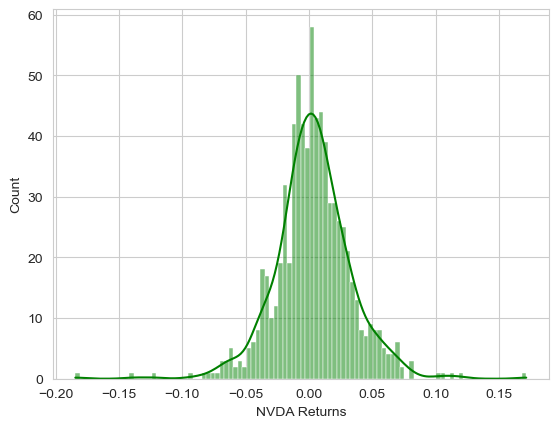

In [41]:
sns.histplot(returns_tech['NVDA Returns'],color='green',bins=100,kde=True)

Lets dig deeper into analysing the stock price of a single comapny

In [42]:
Google=tech_data['GOOG']
#this is a plot showing difference between open an close prices of google
px.line(Google,Google.index,y=["Open","Close"],title="Difference between open and close prices of Google stocks")

The graph above shows the difference between opena and close price of google over the time period but it doesnt give much more information than 
These plots do not tell us about the high and low prices of the stock that day, are not continuous and do not show volatality of the stock

The following are some technical plots that help us better visualize the market 

# Technical plots: Candlestick plot
Candlestick charts provide a visual representation of price movements. They show open, high, low, and close prices for each period, helping the viewer identify price trends, reversals, and key support/resistance levels.

In [43]:
Google=tech_data['GOOG']

In [44]:
Google[['Open', 'High', 'Low', 'Close']].iplot(kind='candle')

# Technical Plots: Moving averages 
Moving averages help smooth out price data, making it easier to identify trends. Short-term moving averages provide insight into short-term trends, while long-term moving averages reveal more extended trends. Crossovers of moving averages can signal buy or sell opportunities.

In [45]:
Google['Close'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

# Technical Plots: Bollinger Plot
Bollinger Bands represent the volatality of a stock, if a stock is more volatile it would have a wider bollinger band. 

In [46]:
Google['Close'].ta_plot(study='boll')

# MACHINE LEARNING IMPLEMENTATION

# ARIMA model
ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series model in stock analysis. It combines auto-regressive, differencing, and moving average components to forecast stock price movements based on historical data

In [47]:
# splittin data
train = Google[: 625]
test = Google[625:]
#roughly splitting into 30-70%

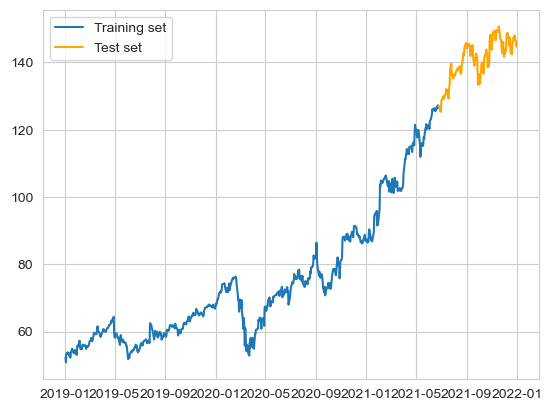

In [48]:
plt.plot(train["Close"], label='Training set')
plt.plot(test["Close"], label='Test set', color='orange')
plt.legend()

Fitting model

In [49]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train["Close"], order=(0,1,1))
results = model.fit()

c:\Users\sumed\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\sumed\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\sumed\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [50]:
plot_data = pd.DataFrame({
    'Actual Values': train['Close'].values,
    'Fitted Values': results.fittedvalues,
    'Date': train.index  # Assuming your DataFrame has a 'Date' column
})

# Create an interactive plot using Plotly
fig = px.line(plot_data, x='Date', y=['Actual Values', 'Fitted Values'],
              labels={"Date": "Date", "value": "Value"})
fig.update_layout(title="ARIMA Model: Actual vs. Fitted Values")
fig.update_layout(legend=dict(orientation="h", y=1.15, x=0.5))
fig.show()

In [51]:
predictions = results.forecast(steps=180)

c:\Users\sumed\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [52]:
predictions


625    127.187747
626    127.187747
627    127.187747
628    127.187747
629    127.187747
          ...    
800    127.187747
801    127.187747
802    127.187747
803    127.187747
804    127.187747
Name: predicted_mean, Length: 180, dtype: float64

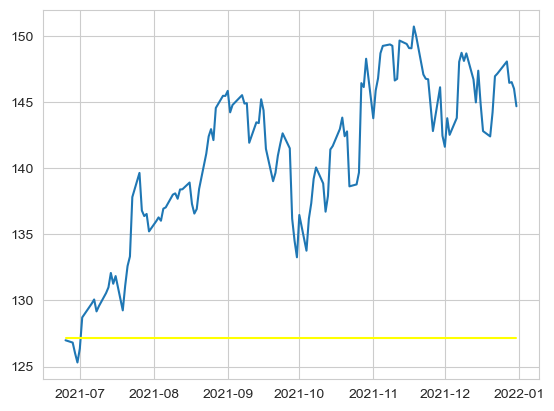

In [53]:
predict = test
predictions = predictions.reset_index()
predict = predict.reset_index()
predict["future"] = predictions["predicted_mean"]
predict = predict.set_index('Date')
plt.plot(test["Close"], label='Actual values')
plt.plot(predict["future"],color='yellow', label='Predicted values')

The ARIMA model has clearly failed , ARIMA works under an assumption that the given data is exhibiting seasonality

We can try differencing the data but for now we will use Linear Regression Model

# Linear Regression

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test =scaler.transform(test)

In [55]:
xtrain = train[['Volume','Open']]
xtest = test[['Volume','Open']]
ytrain = train["Close"]
ytest = test["Close"]

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [57]:
sc=np.round(model.score(xtest, ytest),2) * 100
r2=np.round(r2_score(ytest,pred),2)
mse=np.round(mean_squared_error(ytest,pred),2)
mae=np.round(mean_squared_error(ytest,pred),2)

Accuracy score : 94.0 %
R2 Score : 0.94
Mean Squared error : 2.46
Mean Absolute error : 2.46


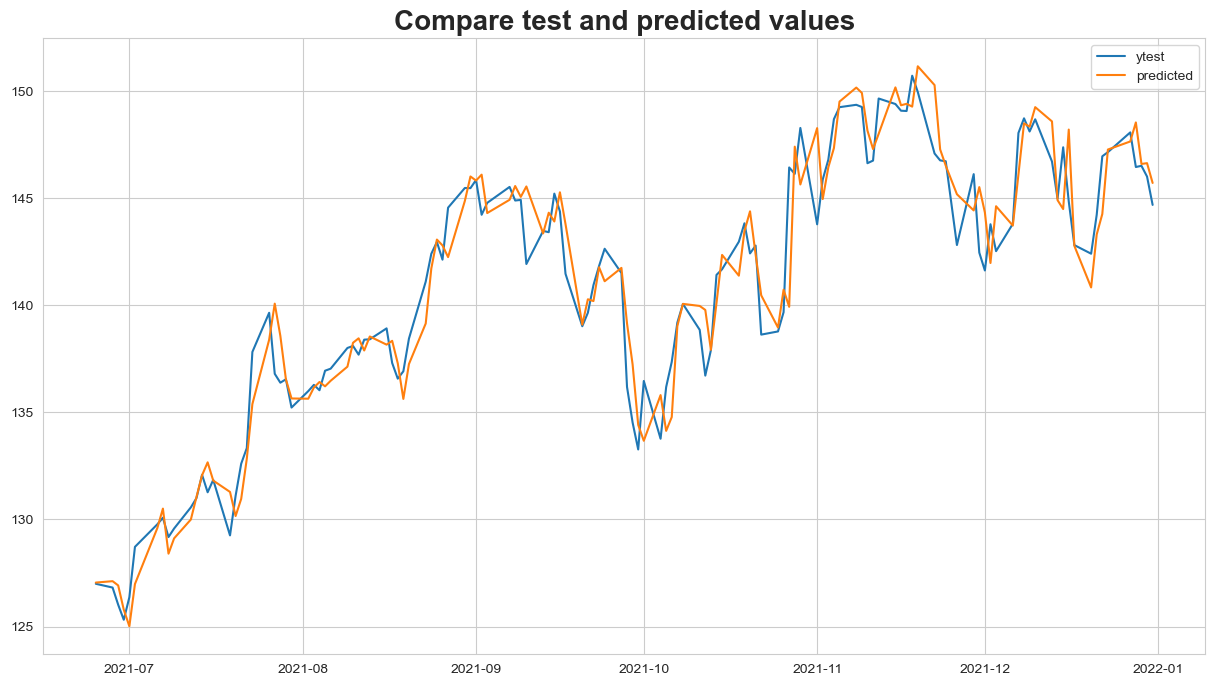

In [58]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=ytest.index)
plt.plot(ytest)
plt.plot(p)
plt.legend(['ytest','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
print('Accuracy score : {} %'.format(sc))
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))

In [62]:
# lets put some value in the Linear Regression model and check what value it give

In [70]:
# putting index as 500
index=int(input())
print(Google.iloc[index])

Stock Info
Open      8.675000e+01
High      8.730000e+01
Low       8.645550e+01
Close     8.694250e+01
Volume    6.936000e+06
Name: 2020-12-24 00:00:00, dtype: float64


In [71]:
new_data = [[Google.iloc[index]['Volume'], Google.iloc[index]['Open']]]  # Replace with actual values for your features
new_pred = model.predict(new_data)
print("Predicted Close value:", new_pred)
print("Actual Close value:", Google.iloc[index]['Close'])

Predicted Close value: [86.9565933]
Actual Close value: 86.94249725341797


c:\Users\sumed\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Thank You